In [1]:
# 패키지 임포트
import pandas as pd

# 데이터 불러오기
train = pd.read_csv('../Data/orb_data/train.csv', index_col=0)
test = pd.read_csv('../Data/orb_data/test.csv', index_col=0)
sample_submission = pd.read_csv('../Data/orb_data/sample_submission.csv', index_col=0)

# Train 데이터의 타입을 Sample_submission에 대응하는 가변수 형태로 변환
column_number = {}
for i, column in enumerate(sample_submission.columns):
    column_number[column] = i
    
def to_number(x, dic):
    return dic[x]

train['type_num'] = train['type'].apply(lambda x : to_number(x, column_number))

# 모델에 적용할 데이터 셋 준비 
train_x = train.drop(columns=['type', 'type_num'], axis=1)
train_y = train['type_num']
test_x = test

In [2]:
# FiberID 행 지우기
del train_x['fiberID']
del test_x['fiberID']

train_x.columns
test_x.columns

Index(['psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z',
       'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i', 'fiberMag_z',
       'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z',
       'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z'],
      dtype='object')

In [3]:
test_x

,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
id,,,,,,,,,,,,,,,,,,,,
199991,23.817399,22.508963,20.981106,18.517316,17.076079,25.053890,23.167848,21.335901,18.835858,17.434384,22.246697,22.796239,21.195315,18.584486,17.154284,25.391534,22.499435,21.011918,18.499341,17.091474
199992,22.806983,21.937111,20.335770,20.000512,19.527369,22.498565,22.186000,20.618879,20.301204,20.030078,21.729831,21.837511,20.196128,19.967204,19.683671,22.475338,21.853442,20.173169,19.796757,19.567372
199993,21.024250,19.235669,18.304061,17.808608,17.380113,21.205546,19.439533,18.344433,17.909690,17.538164,20.722629,18.710223,17.611851,17.158519,16.843986,20.579314,18.653338,17.562108,17.120529,16.708748
199994,20.503424,20.286261,20.197204,20.162419,20.059832,20.976132,20.611498,20.567262,20.479318,20.277472,20.329269,20.385262,20.129157,20.206574,20.212342,20.479879,20.280943,20.150499,20.206221,20.092909
199995,24.244851,22.668237,21.239333,19.284777,18.235939,25.681860,22.935289,21.642456,19.624926,18.591749,22.308298,22.957496,21.285033,19.299120,18.307526,25.489360,22.857290,21.191862,19.237964,18.280368
199996,19.055566,18.217626,17.846363,17.690645,17.659854,19.446735,18.509198,18.169851,18.052531,18.096497,19.161445,18.236677,17.866153,17.767155,17.783766,19.050795,18.152147,17.833117,17.732638,17.685430
199997,20.244585,19.826050,19.988219,20.179882,20.343395,20.528129,20.177676,20.313347,20.462498,20.747553,20.304327,19.872854,19.997101,20.166693,20.276620,20.206031,19.836830,19.977815,20.138281,20.391832
199998,17.151421,16.269550,15.970379,15.818149,15.828719,17.481883,16.587468,16.309604,16.204427,16.158013,17.158633,16.288850,15.992600,15.891229,15.848377,17.121650,16.260794,15.942999,15.823037,15.796202
199999,20.867621,19.537739,18.798308,18.507197,18.213139,20.797449,19.468397,18.689733,18.248384,17.889286,18.997613,17.665354,16.922142,16.544860,16.243147,18.630556,17.301620,16.559360,16.151482,15.801482


In [4]:
# 훈련 데이터와 테스트 데이터로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2)

# One-Hot Encoding
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [13]:
# 모델 구성
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()

model.add(Dense(512, input_shape=(20,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(19, activation='softmax'))

# 모델 요약
model.summary()

# 훈련
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # kinds of loss = [mse, mae]
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=256) # epochs number changeable

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               10752     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_16 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_17 (Dense)             (None, 128)              

127993/127993 [==============================] - 2s 15us/step - loss: 0.5310 - accuracy: 0.8160 - val_loss: 0.6321 - val_accuracy: 0.7712
Epoch 45/50
 38656/127993 [========>.....................] - ETA: 1s - loss: 1.1831 - accuracy: 0.8031

KeyboardInterrupt: 

In [10]:
# 평가예측
loss, accuracy = model.evaluate(X_test, y_test, batch_size=256)
print('loss: ', loss)
print('accuracy: ', accuracy)

39999/39999 [==============================] - 0s 5us/step
loss:  2.3009168502136976
accuracy:  0.25065627694129944


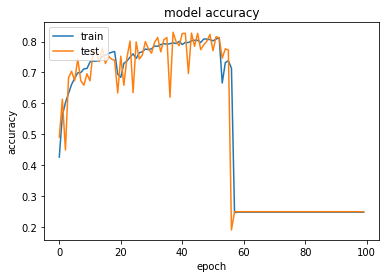

In [11]:
# summarize history for accuracy
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

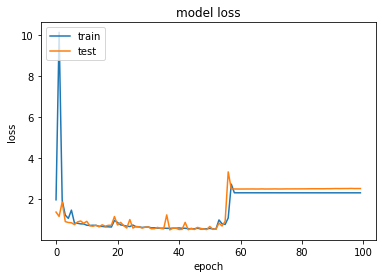

In [12]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
# Evaluating in optimal parameter
y_pred = model.predict(test_x)
print(y_pred)

'''
# # 제출 파일 생성
# submission = pd.DataFrame(data=y_pred, columns=sample_submission.columns, index=sample_submission.index)
# submission.to_csv('submission.csv', index=True)
'''

[[2.2783577e-14 5.2701055e-12 1.5773116e-02 ... 1.0139947e-07
  5.9757096e-04 1.2698716e-06]
 [7.1073237e-06 1.2518824e-09 2.3593316e-07 ... 1.6889935e-05
  3.0825488e-04 1.7427168e-04]
 [1.5894063e-04 4.7068133e-06 5.3601019e-07 ... 1.7658815e-06
  2.0272673e-04 4.8858838e-06]
 ...
 [2.9147784e-03 3.1738746e-05 1.4188954e-10 ... 1.8154092e-12
  4.1569510e-04 8.4845118e-02]
 [4.1343188e-07 3.1351373e-09 6.8444010e-09 ... 6.4508219e-13
  3.2879079e-06 1.9802204e-03]
 [4.5690488e-04 7.5406556e-06 2.4887092e-09 ... 1.5983865e-12
  1.5337840e-06 1.5371302e-04]]


"\n# # 제출 파일 생성\n# submission = pd.DataFrame(data=y_pred, columns=sample_submission.columns, index=sample_submission.index)\n# submission.to_csv('submission.csv', index=True)\n"

# 결과 분석

epoch이 50인 부분에서 가장 좋은 결과가 나오므로 epoch를 줄인다. 

그러나 epoch를 줄이는 것은 근시안적 방법이므로 learning rate를 줄여보기로 했다. 

하지만 adam의 learning rate의 default 값은 0.001로 충분히 낮다. 

X1, X2의 결과로 Y가 나오는 데이터가 있을 때, X1과 X2의 값의 차이가 클 경우 learning rate를 적절하게 주어도 값이 발산하는데, normalize를 통해 데이터를 정리합니다.

그러므로 데이터 스케일을 조정할 것입니다.

출처: https://leechanho.tistory.com/24